In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

2024-09-03 00:35:45.172372: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 00:35:45.172424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 00:35:45.173829: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **About my Capstone Project**
Businesses have difficulty extracting insights from large datasets and traditional methods are insufficient for complex analysis. My project proposes an AI-based data analytics system to empower decision-makers in the retail industry.

Specific retail industry challenges to be cover on
- Customer segmentation: identifying distinct customer groups
- Sales forecasting : forecasting the daily sales
- Demand forecasting: forecast the demand for specific product

# **Information on the Dataset**

This dataset contains detailed records of coffee sales from a vending machine. The dataset spans from March 2024 to present time, capturing daily transaction data. It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products.


Description of the columns:<br>
_date - Date of purchasing<br>
datetime - Datetime of purchasing<br>
cash_type - Cash or card purchasing<br>
card - Anonymous card number for each customer<br>
money - Amount of money in Ukrainian hryvnias<br>
coffee_name - Coffee type_<br>

Link for the dataset : https://www.kaggle.com/datasets/ihelon/coffee-sales/data

**ASSUMPTION**

It is assumed the place of transaction is in Ukraine because the money transacted is in Ukrainian hryvnias.


In [3]:
#Load the data
df = pd.read_csv('/kaggle/input/coffee-sales/index.csv')
display(df.head(5))

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
# Understanding the data

print('Dimension of the data', df.shape)

print('\n','--'*25,'\n')

print('Summary of the data\n')
display(df.info())

print('\n','--'*25,'\n')

print('Missing values in the dataframe\n')
display(df.isnull().sum())


Dimension of the data (1395, 6)

 -------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1395 non-null   object 
 1   datetime     1395 non-null   object 
 2   cash_type    1395 non-null   object 
 3   card         1306 non-null   object 
 4   money        1395 non-null   float64
 5   coffee_name  1395 non-null   object 
dtypes: float64(1), object(5)
memory usage: 65.5+ KB


None


 -------------------------------------------------- 

Missing values in the dataframe



date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [5]:
# Filling in those missing values as NA

missing_values = df['card'].isnull()
df.loc[missing_values, 'card'] = 'NA'

print('Dimension of the data', df.shape)

print('\n','--'*25,'\n')

print('Missing values in the dataframe\n')
display(df.isnull().sum())

Dimension of the data (1395, 6)

 -------------------------------------------------- 

Missing values in the dataframe



date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [6]:
# Adding Ukraine seasons into the table using Pandas

# Str datatype does not have month attribute.
# Convert "date" to datetime to convert the date format to YY-MM-DD
df['date'] = pd.to_datetime(df['date'])

# Create a function to determine the season based on the datetime
def determine_season(date):
    if 3 <= date.month <= 5:
        return 'Spring'
    elif 6 <= date.month <= 8:
        return 'Summer'
    elif 9 <= date.month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Add a season column into the dataframe
df['season'] = df['date'].apply(determine_season)

# Adding hour into the dataframe
# Convert 'datetime' to fatetime to convert the format to YYYY-MM-DD HH:MM:SS.SSS
df['datetime'] = pd.to_datetime(df['datetime'])

# Add a hour column into the dataframe
df['hour'] = df['datetime'].dt.hour

display(df.tail(5))

,date,datetime,cash_type,card,money,coffee_name,season,hour
1390,2024-08-27,2024-08-27 10:04:04.563,card,ANON-0000-0000-0375,32.82,Latte,Summer,10
1391,2024-08-28,2024-08-28 12:08:18.772,card,ANON-0000-0000-0551,27.92,Americano with Milk,Summer,12
1392,2024-08-28,2024-08-28 12:10:04.139,card,ANON-0000-0000-0551,32.82,Cappuccino,Summer,12
1393,2024-08-28,2024-08-28 12:35:06.944,card,ANON-0000-0000-0375,23.02,Americano,Summer,12
1394,2024-08-28,2024-08-28 13:48:35.199,card,ANON-0000-0000-0552,27.92,Americano with Milk,Summer,13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1395 non-null   datetime64[ns]
 1   datetime     1395 non-null   datetime64[ns]
 2   cash_type    1395 non-null   object        
 3   card         1395 non-null   object        
 4   money        1395 non-null   float64       
 5   coffee_name  1395 non-null   object        
 6   season       1395 non-null   object        
 7   hour         1395 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), object(4)
memory usage: 81.9+ KB


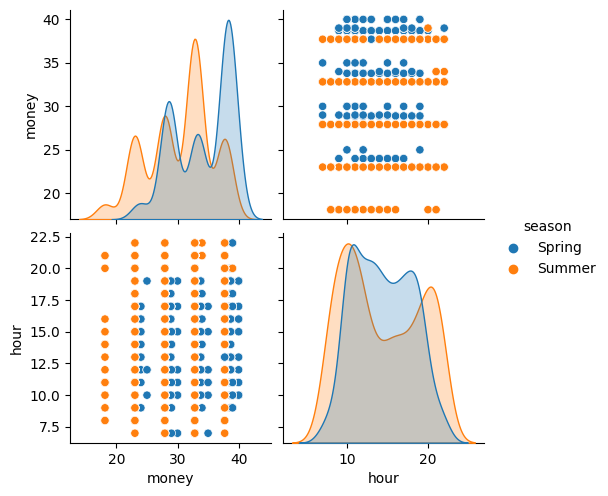

In [8]:
sns.pairplot(df, hue = 'season')
plt.show()

## Analyze of the pairplot

**1. Distributions:**<br><br>
  **Money:**<br>
  The distribution is skewed to the right, indicating that there are a few high-value transactions.<br><br>
  **Hour:**<br>
  The distribution is relatively uniform, suggesting that transactions are spread fairly evenly across different hours. The peak hours are around 9-10am where the working hours started.<br><br>
   
**2. Relationships:**<br><br>
  **Money vs. hour:**<br>
  There seems to be a slight negative correlation, suggesting that higher amounts of money might be spent at earlier hours. However, this relationship is not very strong.<br><br>
  **Money vs. season:**<br>
  The scatterplot shows that there might be a slight difference in spending patterns between seasons, but it's not very clear.<br><br>
  **Hour vs. season:**<br>
  The scatterplot doesn't reveal any strong relationship between hour and season.<br><br>
  
**3. Seasonal Differences:**<br><br>
  The density plots for _money_ and _hour_ by season show some differences. For instance, the distribution of money might be slightly different in the summer compared to the spring. However, these differences are not very pronounced. 


# Identifying Distinct Customer Groups

card
ANON-0000-0000-0012    96
NA                     89
ANON-0000-0000-0009    67
ANON-0000-0000-0141    42
ANON-0000-0000-0097    38
Name: count, dtype: int64


Text(0, 0.5, 'Count')

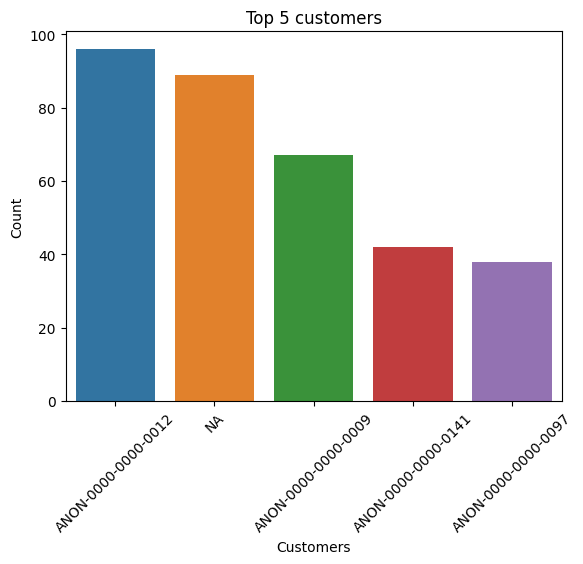

In [47]:
# Understanding customer data
top_5_card_count = df['card'].value_counts().head(5)
print(top_5_card_count)

sns.countplot(x='card',data=df, order=top_5_card_count.index)
plt.title('Top 5 customers')
plt.xticks(rotation=45)
plt.xlabel('Customers')
plt.ylabel('Count')

## Understanding the data for identifying distinct customer group

There is 6% transaction done in cash. This 6% counts could represent more than 1 unique customer but for this dataset, it is reflecting as 1 unique customer under "card column". This will affect my analyzing if I try to group them into high-value, low-value, and lost customer. 6% is considered insignificant to the whole dataset even if I will to remove them out from the dataset.

In [99]:
# removing the cash payment from the data
card_df = df.copy()
card_df = card_df[card_df['card'] != 'NA']
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1394
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1306 non-null   datetime64[ns]
 1   datetime     1306 non-null   datetime64[ns]
 2   cash_type    1306 non-null   object        
 3   card         1306 non-null   object        
 4   money        1306 non-null   float64       
 5   coffee_name  1306 non-null   object        
 6   season       1306 non-null   object        
 7   hour         1306 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), object(4)
memory usage: 86.7+ KB


In [100]:
# Use groupby function to group data by unique customer identifiers ('card')
# Calculate customer metrics to characterize their behavior
customer_metrics = card_df.groupby('card').agg(
    total_spending=('money','sum'),
    average_spending=('money','mean'),
    purchase_frequency=('datetime','nunique'),
    preferred_coffee=('coffee_name',lambda x: x.mode().iloc[0])
)

display(customer_metrics.head())
customer_metrics.info()

,total_spending,average_spending,purchase_frequency,preferred_coffee
card,,,,
ANON-0000-0000-0001,646.14,38.008235,17,Latte
ANON-0000-0000-0002,77.40,38.700000,2,Hot Chocolate
ANON-0000-0000-0003,744.04,27.557037,27,Americano
ANON-0000-0000-0004,289.50,32.166667,9,Americano
ANON-0000-0000-0005,33.80,33.800000,1,Americano with Milk


<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, ANON-0000-0000-0001 to ANON-0000-0000-0552
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_spending      552 non-null    float64
 1   average_spending    552 non-null    float64
 2   purchase_frequency  552 non-null    int64  
 3   preferred_coffee    552 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 21.6+ KB


**Why use Kmeans?**<br>
K-means is a popular choice for customer segmentation due to its simplicity, efficiency, and scalability. It automatically group customer based on their similarity in terms of the calculated metrics.


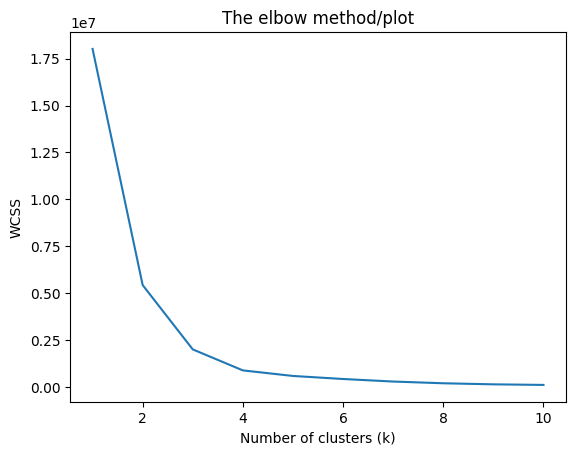

In [101]:
from sklearn.cluster import KMeans

# Select relevant features
x = customer_metrics[['total_spending','average_spending','purchase_frequency']]

# Choose an ideal value of k baded on the distance between the data points and their assigned clusters.
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

Based on the elbow plot, I decided on k value = 3 where the sum of squared distance (SSE) begins to flatten out and see an inflection point.

In [102]:
# Train the model
kmeans = KMeans(n_clusters = 3)
kmeans_model = kmeans.fit(x)
print(kmeans_model)
y_kmeans = kmeans_model.predict(x)

KMeans(n_clusters=3)


In [103]:
# Getting Labels of Each Record
customer_metrics['segment'] = kmeans_model.labels_
customer_metrics.head()

,total_spending,average_spending,purchase_frequency,preferred_coffee,segment
card,,,,,
ANON-0000-0000-0001,646.14,38.008235,17,Latte,0
ANON-0000-0000-0002,77.40,38.700000,2,Hot Chocolate,1
ANON-0000-0000-0003,744.04,27.557037,27,Americano,0
ANON-0000-0000-0004,289.50,32.166667,9,Americano,1
ANON-0000-0000-0005,33.80,33.800000,1,Americano with Milk,1


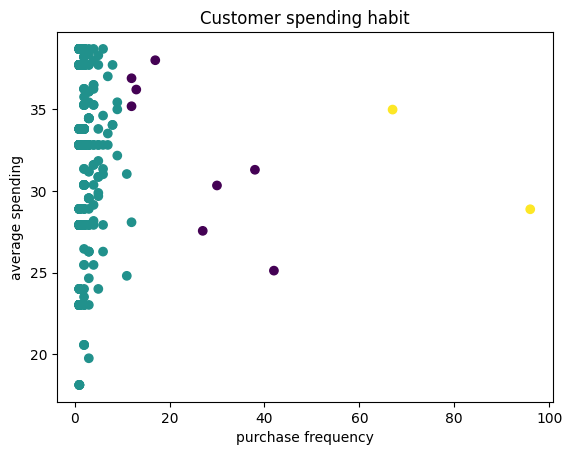

In [104]:
# Visualize the cluster
plt.scatter(customer_metrics['purchase_frequency'], customer_metrics['average_spending'], c=customer_metrics['segment'], cmap='viridis')
plt.xlabel('purchase frequency')
plt.ylabel('average spending')
plt.title('Customer spending habit')
plt.show()

## Analyzing on the group segmentation

The scatter plot illustrates the relationship between average spending and purchase frequency for a group of customers. Each dot represents a customer, with its position on the graph determined by their average spending and purchase frequency.

**Left cluster:**<br>
This cluster likely to represents customers who make infrequent but high-value purchases. They might be looking for premium coffee and are willing to pay a premium price. However, there is also some distinct customers buying low-value purchase in the group. 
<br>

**Middle cluster:**<br>
This cluster likely to represents customer who are regular buyers and are willing to spend a moderate amount on coffee. They might be looking for value and convenience. 
<br>

**Right cluster:**<br>
This cluster likely represents a mix of customers who are either high-value buyers or regular buyers seeking value. They are both highly engaged and frequent customers. 
<br><br>
**Overall Conclusion**<br>
The clusters might also represent different stages of customer lifecycle. For example, the left cluster could represent new customers or customers who happened to passby the vending machine, while middle and right clusters could represent loyal and repeat customers. 


# Forecast Daily Sales Amount

# **Why RNN(LSTM)?**

LSTM is a specialized RNN well-suited for time series forecasting due to its ability to handle long-term dependencies. It uses "gates" to control information flow and avoids the vanishing gradient problem, making it ideal for capturing trends, seasonality, and complex patterns.<br><br>
code citation: https://www.kaggle.com/code/mingboi/rolling-multi-step-forecasts-with-lstm-rnn-gru#3.-Forecasting-with-Recurrent-Neural-Networks

In [85]:
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [55]:
# Prepare data for RNN model
new_df = df.copy()
new_df = new_df.groupby('date')['money'].sum().reset_index()
new_df = new_df.set_index('date')
new_df = new_df.rename(columns={'money': 'y'})
display(new_df.head())
new_df.info()

,y
date,
2024-03-01,396.3
2024-03-02,228.1
2024-03-03,349.1
2024-03-04,135.2
2024-03-05,338.5


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178 entries, 2024-03-01 to 2024-08-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       178 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [86]:
# Pre-processing

# Creates lagged values for a specificed column in DataFrame
def create_lags(df, days=7):
    # create lagged data for features
    for i in range(days):
        df["Lag_{lag}".format(lag=i+1)] = df['y'].shift(i+1)
    return df

# Creates a 3D dataset for input to a time series model
def create_features(X, time_steps=1, n_features=7):
    # create 3d dataset for input
    cols, names = list(), list()
    for i in range(1, time_steps+1):
        cols.append(X.shift(-time_steps))
        names += [name + "_" + str(i) for name in X.columns]
        agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    agg.dropna(inplace=True)
    agg = agg.values.reshape(agg.shape[0], time_steps, n_features)
    return agg

# Creates a DataFrame with a time series index and the predicted values.
def create_dataset(df, yhat):
    # yhat needs to be scaled
    preds = pd.DataFrame(yhat.flatten())
    temp = pd.concat([df.iloc[:,0], preds])
    temp.columns = ['y']
    date_idx = pd.date_range(start='2024-03-01', periods=temp.shape[0])
    temp.set_index(date_idx, inplace=True)
    return temp

In [57]:
chosen = new_df.copy()
chosen = create_lags(chosen)
chosen.dropna(inplace=True)

# Fit scaler on training data only to prevent data leakage
X = chosen.iloc[:,1:]  # Features (all rows for training, all columns except the first)
y = chosen.iloc[:,0]    # Target variable (all rows for training, first column)

scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_x.fit(X)  # Fit scaler on features

scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_y.fit(y.values.reshape(-1, 1))  # Reshape y for fitting on single feature

X_scaled = scaler_x.transform(X)
y_scaled = scaler_y.transform(y.values.reshape(-1, 1))

scaled = np.hstack((X_scaled, y_scaled))
scaled_df = pd.DataFrame(scaled, index=chosen.iloc[:].index, columns=chosen.columns)

print(scaled_df.shape)
scaled_df.tail()

(171, 8)


,y,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
date,,,,,,,,
2024-08-24,0.522424,0.276953,0.261212,0.530294,0.150283,0.403624,0.456342,0.161270
2024-08-25,0.161270,0.522424,0.276953,0.261212,0.530294,0.150283,0.403624,0.224235
2024-08-26,0.224235,0.161270,0.522424,0.276953,0.261212,0.530294,0.150283,0.432729
2024-08-27,0.432729,0.224235,0.161270,0.522424,0.276953,0.261212,0.530294,0.007871
2024-08-28,0.007871,0.432729,0.224235,0.161270,0.522424,0.276953,0.261212,0.134541


In [58]:
# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop('y', axis=1), scaled_df['y'], test_size=0.2, random_state=42)

# Create features
x_train_np = create_features(X_train, 7, 7)
x_test_np = create_features(X_test, 7, 7)

# Get indices of rows in x_train_np and x_test_np
train_indices = np.arange(x_train_np.shape[0])
test_indices = np.arange(x_test_np.shape[0])

# Truncate y_train and y_val based on the indices
y_train = y_train.iloc[train_indices]
y_test = y_test.iloc[test_indices]

print(x_train_np.shape, x_test_np.shape)
print(y_train.shape, y_test.shape)

(129, 7, 7) (28, 7, 7)
(129,) (28,)


In [95]:
# Define the layer list
LSTM_model = [
    LSTM(units=128, return_sequences=True, activation = 'tanh', input_shape=[x_train_np.shape[1], x_train_np.shape[2]]),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(units=1)
]

# Create the model from the layer list
model = tf.keras.Sequential(LSTM_model)

# Compile Model
model.compile(loss='mse', optimizer='adam')

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Fit Model (using the model created from the layer list)
history = model.fit(x_train_np, y_train, epochs=100, batch_size=70, 
                    validation_data=(x_test_np, y_test), verbose=True, shuffle=True, callbacks=[early_stopping])

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - loss: 0.1849 - val_loss: 0.0591
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0865 - val_loss: 0.0336
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0644 - val_loss: 0.0515
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0638 - val_loss: 0.0501
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0658 - val_loss: 0.0383
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0510 - val_loss: 0.0331
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0547 - val_loss: 0.0336
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0562 - val_loss: 0.0347
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0521 - val_loss: 0.0344
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0488 - val_loss: 0.0332
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0500 - val_loss: 0.0328
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0476 - val_l

In [96]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 7, 128)         │        69,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,317 (1.36 MB)

 Trainable params: 119,105 (465.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 238,212 (930.52 KB)

In [97]:
# Predict on Test Data
y_pred = model.predict(x_test_np)
lstm_pred = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(pd.DataFrame(y_test))

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, lstm_pred))
print("RMSE:", rmse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
RMSE: 115.93652712993645


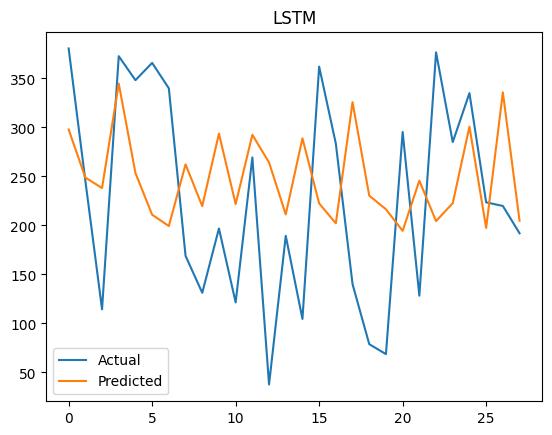

In [98]:
# Visualization
plt.plot(y_test_actual, label='Actual')
plt.plot(lstm_pred, label='Predicted')
plt.title('LSTM')
plt.legend()
plt.show()

# Demand Forecast for Specific Products

**Why Random Forest?**<br>
Random Forest is a powerful tool for demand forecasting due to its ability to handle nonlinear relationships, provide feature importance, and reduce overfitting. It's suitable for complex data, handles missing values well, and can be applied to large datasets. These advantages make it a popular choice for accurate and reliable demand predictions.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [37]:
# Preparing dataframe for model training

from sklearn.preprocessing import LabelEncoder

rfdf = df.copy()

le = LabelEncoder()
rfdf['date'] = le.fit_transform(rfdf['date'])
rfdf['datetime'] = le.fit_transform(rfdf['datetime'])
rfdf['cash_type'] = le.fit_transform(rfdf['cash_type'])
rfdf['card'] = le.fit_transform(rfdf['card'])
rfdf['coffee_name'] = le.fit_transform(rfdf['coffee_name'])
rfdf['season'] = le.fit_transform(rfdf['season'])


,date,datetime,cash_type,card,money,coffee_name,season,hour
date,NaN,0.997269,NaN,NaN,NaN,NaN,0.852688,NaN
datetime,0.997269,NaN,NaN,NaN,NaN,NaN,0.865302,NaN
cash_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
money,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coffee_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,0.852688,0.865302,NaN,NaN,NaN,NaN,NaN,NaN
hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


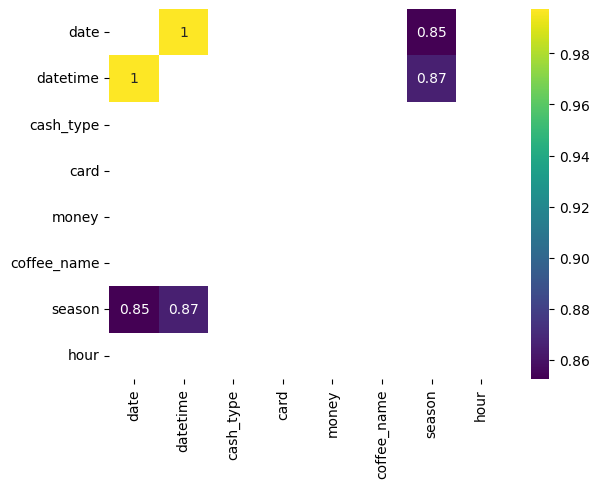

In [38]:
# Correlation Coefficient
dfcorr = rfdf.corr()
filteredDf = dfcorr[((dfcorr > 0.5) | (dfcorr < -0.5)) & (dfcorr !=1.000)]
display(filteredDf)

sns.heatmap(filteredDf, annot=True, cmap="viridis")
plt.show()

In [39]:
# Train the model
rfx = rfdf.drop(['cash_type','coffee_name','datetime'],axis=1)
rfy = rfdf['coffee_name']

rfx_train, rfx_test, rfy_train, rfy_test = train_test_split (rfx, rfy, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight = 'balanced')
rf_model.fit(rfx_train, rfy_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [40]:
# Predict on Test Data
rfy_pred = rf_model.predict(rfx_test)

In [41]:
rfx_test['coffee_prediction'] = rfy_pred
display(rfx_test.head())

,date,card,money,season,hour,coffee_prediction
1216,159,479,32.82,1,8,7
420,63,150,37.72,0,19,2
1383,175,546,32.82,1,10,2
700,92,255,37.72,1,20,2
599,83,215,32.82,0,14,1


In [42]:
coffee_label = pd.merge(rfdf['coffee_name'],df['coffee_name'], left_index=True, right_index=True)
coffee_label = coffee_label.drop_duplicates()
coffee_label = coffee_label.sort_values(by='coffee_name_x')
coffee_label = coffee_label.rename(columns={'coffee_name_x': 'coffee_prediction'})
coffee_label = coffee_label.rename(columns={'coffee_name_y': 'coffee_name'})
display(coffee_label)

,coffee_prediction,coffee_name
3,0,Americano
5,1,Americano with Milk
44,2,Cappuccino
8,3,Cocoa
20,4,Cortado
31,5,Espresso
1,6,Hot Chocolate
0,7,Latte


In [43]:
wactual = pd.merge(rfx_test, df['coffee_name'], left_index=True, right_index=True)
wactual = pd.merge(wactual,coffee_label,on='coffee_prediction', how='left')
wactual = wactual.rename(columns={'coffee_name_x': 'actual'})
wactual = wactual.rename(columns={'coffee_name_y': 'prediction'})
display(wactual.tail())

,date,card,money,season,hour,coffee_prediction,actual,prediction
274,51,0,37.72,0,11,7,Latte,Latte
275,70,552,29.00,0,15,0,Americano,Americano
276,6,30,38.70,0,11,6,Latte,Hot Chocolate
277,21,49,28.90,0,17,0,Americano,Americano
278,105,308,27.92,1,18,0,Americano,Americano


In [44]:
# Evaluate the Model
report = classification_report(rfy_test,rfy_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        46
           1       0.98      1.00      0.99        64
           2       0.56      0.72      0.63        50
           3       0.00      0.00      0.00        11
           4       0.67      0.50      0.57        24
           5       1.00      1.00      1.00        14
           6       0.20      0.20      0.20        10
           7       0.65      0.58      0.61        60

    accuracy                           0.73       279
   macro avg       0.60      0.61      0.60       279
weighted avg       0.71      0.73      0.71       279



In [45]:
spec_date = wactual[wactual['date'] == 168]
act_count = spec_date['actual'].value_counts()
pred_count = spec_date['prediction'].value_counts()
display(spec_date)
print(act_count)
print(pred_count)

,date,card,money,season,hour,coffee_prediction,actual,prediction
233,168,506,32.82,1,21,7,Latte,Latte


actual
Latte    1
Name: count, dtype: int64
prediction
Latte    1
Name: count, dtype: int64


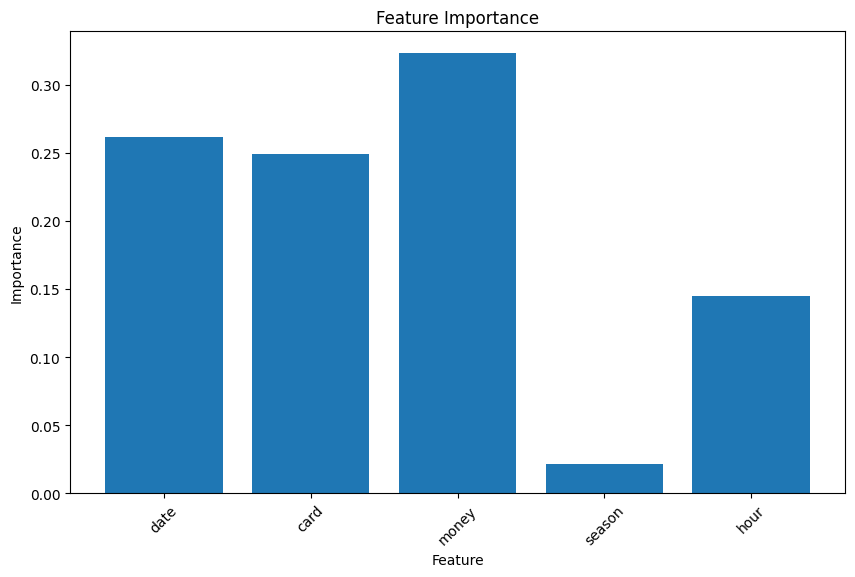

In [46]:
feature_importances = rf_model.feature_importances_

feature_names = ['date','card','money','season','hour']

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()